# DATA COLLECTION

In [192]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

ds = pd.read_csv('house_price.csv')
ds

,date,time,beds,baths,house_size,house_size_units,lot_size,lot_size_units,zip_code,country,price
0,4/13/2022,9:01:00 AM,3,2.50,2590,sqft,6000.00,sqft,98144,USA,795000
1,12/15/2022,4:01:00 PM,4,2.00,2240,sqft,13504.00,sqft,98106,USA,915000
2,9/28/2022,12:39:00 AM,4,3.00,2040,sqft,3783.00,sqft,98107,USA,950000
3,4/17/2022,10:08:00 AM,4,3.00,3800,sqft,5175.00,sqft,98199,USA,1950000
4,3/13/2022,3:53:00 PM,2,2.00,1042,sqft,NaN,NaN,98102,USA,950000
...,...,...,...,...,...,...,...,...,...,...,...
2011,12/15/2022,4:51:00 PM,3,2.00,1370,sqft,21780.00,sqft,98112,USA,910000
2012,3/22/2022,2:59:00 AM,1,1.00,889,sqft,NaN,NaN,98121,USA,550000
2013,3/25/2022,8:20:00 PM,4,2.00,2140,sqft,6250.00,sqft,98199,USA,1150000
2014,7/18/2022,3:01:00 AM,2,2.00,795,sqft,NaN,NaN,98103,USA,590000


# DATA INSPECTION

In [193]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              2016 non-null   object 
 1   time              2016 non-null   object 
 2   beds              2016 non-null   int64  
 3   baths             2016 non-null   float64
 4   house_size        2016 non-null   int64  
 5   house_size_units  2016 non-null   object 
 6   lot_size          1669 non-null   float64
 7   lot_size_units    1669 non-null   object 
 8   zip_code          2016 non-null   int64  
 9   country           2016 non-null   object 
 10  price             2016 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 173.4+ KB


In [194]:
ds.describe()

,beds,baths,house_size,lot_size,zip_code,price
count,2016.00,2016.00,2016.00,1669.00,2016.00,2016.00
mean,2.86,2.16,1735.74,18789.92,98123.64,963625.22
std,1.26,1.00,920.13,288068.22,22.65,944095.43
min,1.00,0.50,250.00,500.00,98101.00,159000.00
25%,2.00,1.50,1068.75,2734.00,98108.00,601750.00
50%,3.00,2.00,1560.00,5000.00,98117.00,800000.00
75%,4.00,2.50,2222.50,7389.00,98126.00,1105250.00
max,15.00,9.00,11010.00,10890000.00,98199.00,25000000.00


In [195]:
ds.isnull().sum()

date                  0
time                  0
beds                  0
baths                 0
house_size            0
house_size_units      0
lot_size            347
lot_size_units      347
zip_code              0
country               0
price                 0
dtype: int64

In [196]:
ds.shape

(2016, 11)

In [197]:
ds = ds.dropna()
ds.shape

(1669, 11)

In [198]:
ds.drop(['date', 'time', 'house_size_units', 'lot_size_units', 'zip_code', 'country'], axis='columns', inplace=True)
ds.head(10)

,beds,baths,house_size,lot_size,price
0,3,2.50,2590,6000.00,795000
1,4,2.00,2240,13504.00,915000
2,4,3.00,2040,3783.00,950000
3,4,3.00,3800,5175.00,1950000
5,2,2.00,1190,43560.00,740000
6,1,1.00,670,6000.00,460000
7,5,3.50,4510,6000.00,3150000
8,3,2.50,1520,741.00,565000
9,4,2.00,2340,9500.00,699000
10,3,2.00,1320,1386.00,899000


# EDA (Exploratory data analysis )

<AxesSubplot:>

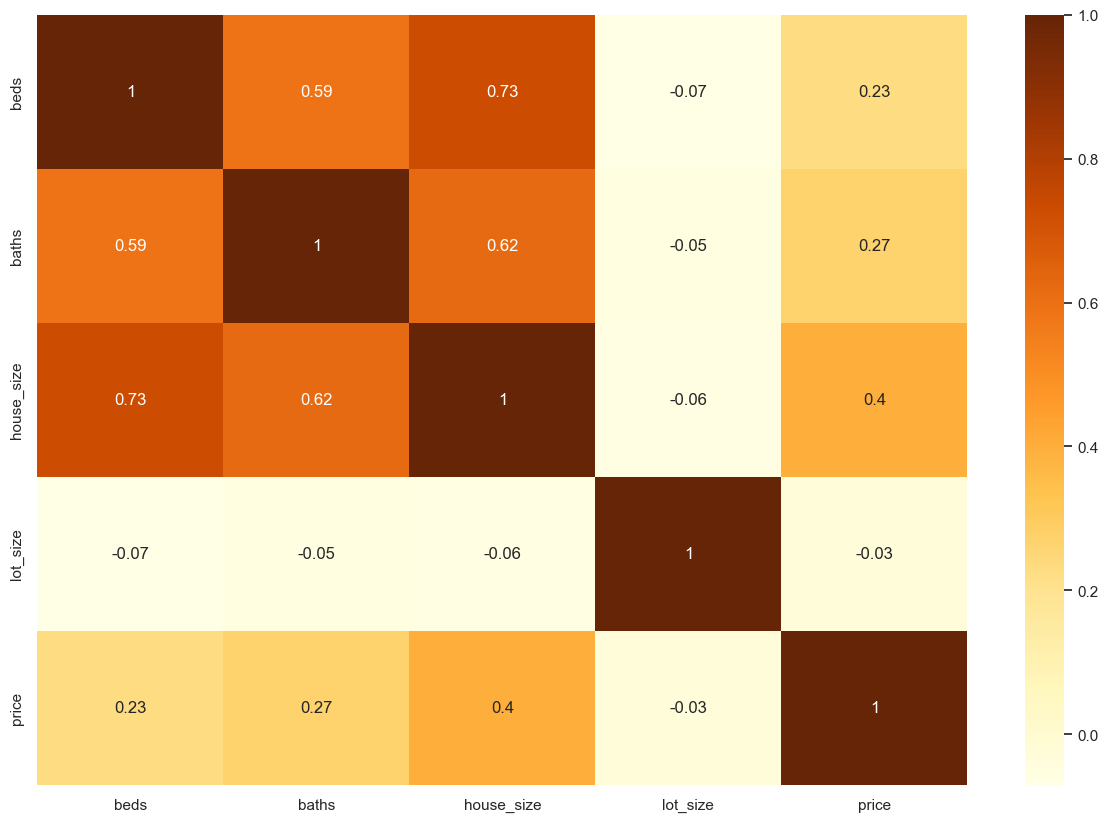

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

correl = ds.corr().round(2)
plt.figure(figsize = (15,10))
sns.heatmap(correl, annot = True, cmap = 'YlOrBr')

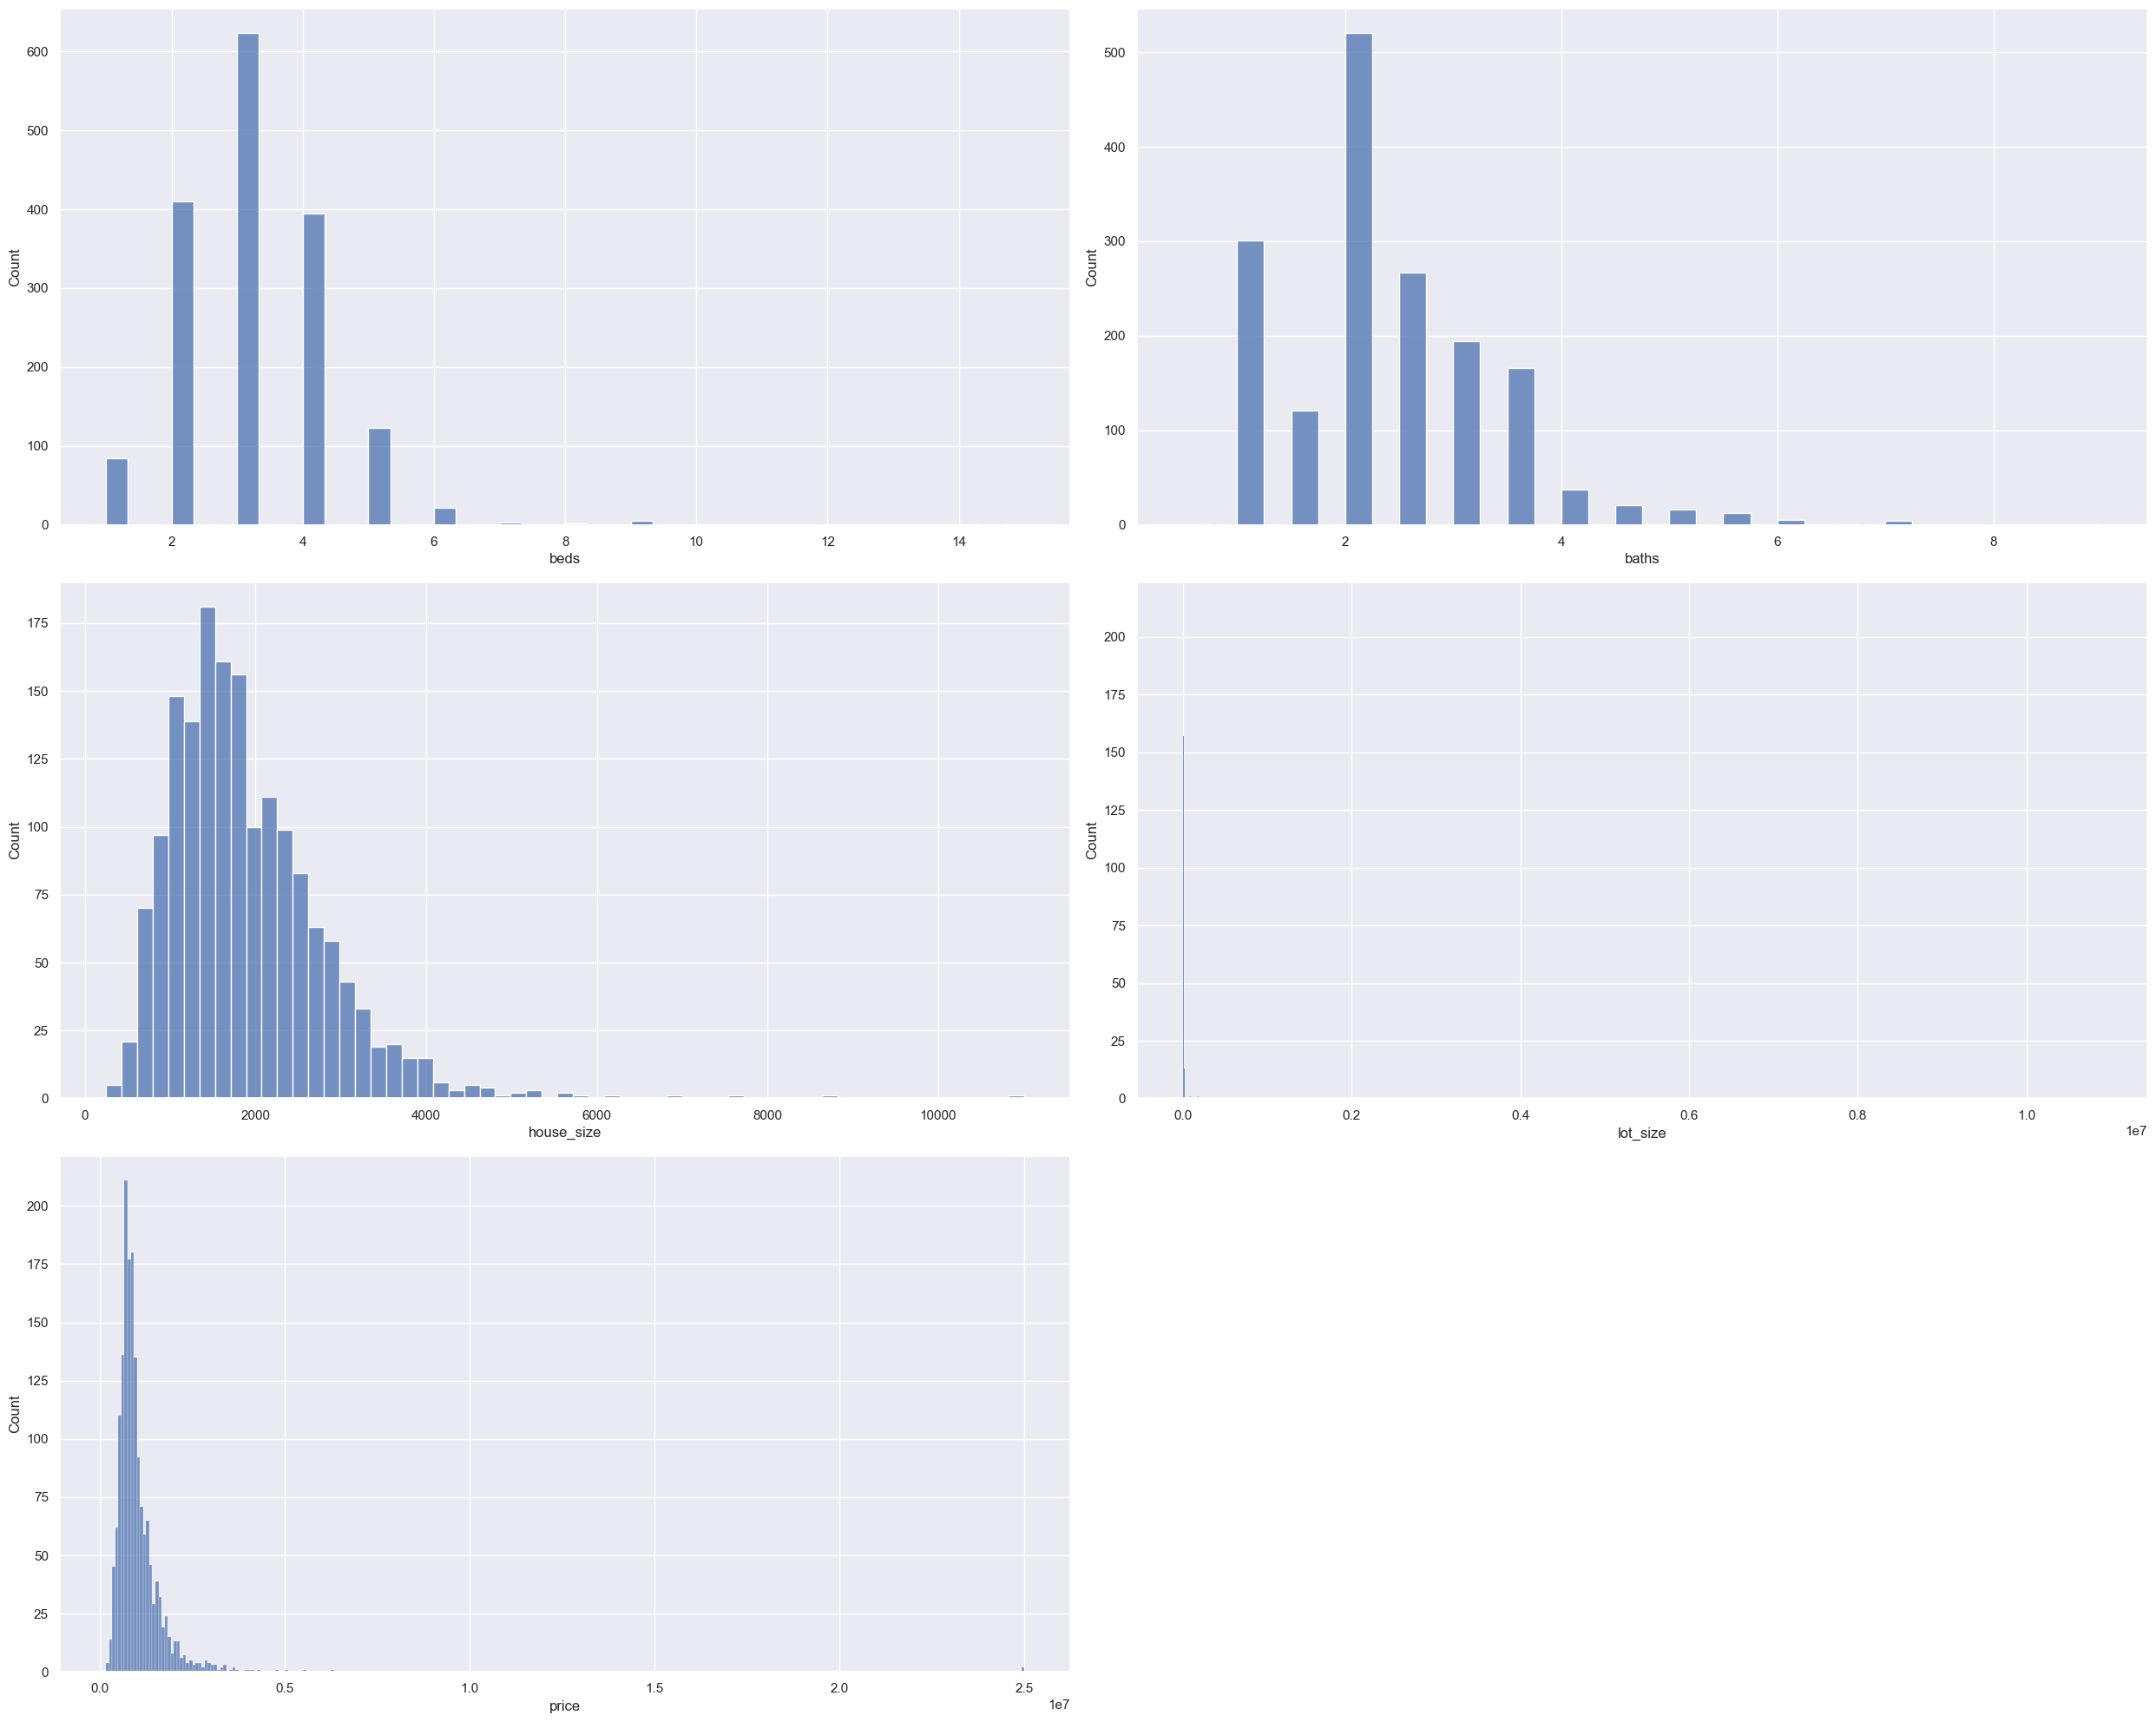

In [200]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.histplot(ds['beds'], kde = False)

plt.subplot(3,2,2)
sns.histplot(ds['baths'], kde = False)

plt.subplot(3,2,3)
sns.histplot(ds['house_size'], kde = False)

plt.subplot(3,2,4)
sns.histplot(ds['lot_size'], kde = False)

plt.subplot(3,2,5)
sns.histplot(ds['price'], kde = False)

plt.tight_layout()

plt.show()

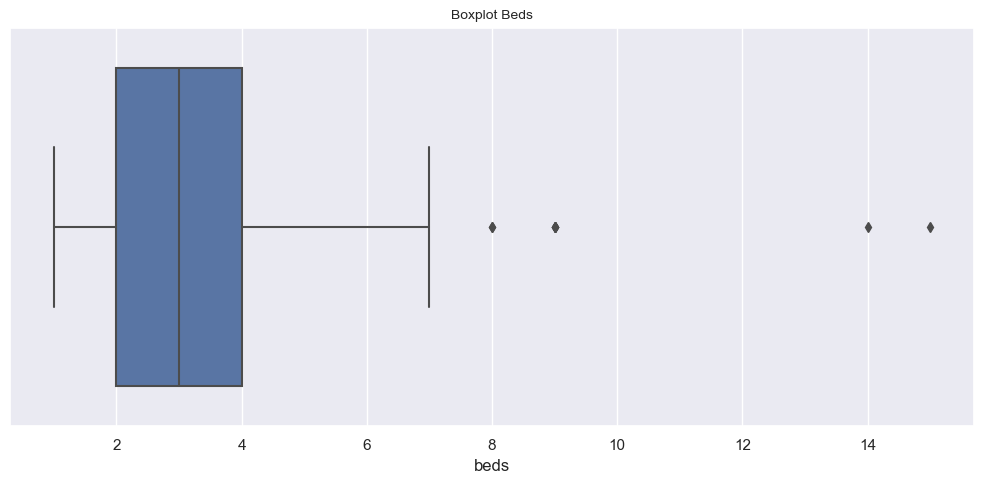

In [201]:
plt.figure(figsize = (10,5))
plt.title("Boxplot Beds", fontdict = {'fontsize': 10})
sns.boxplot(x=ds["beds"])
plt.tight_layout()
plt.show()

In [202]:
ds = ds[ds['beds'] < 10]
ds.shape

(1667, 5)

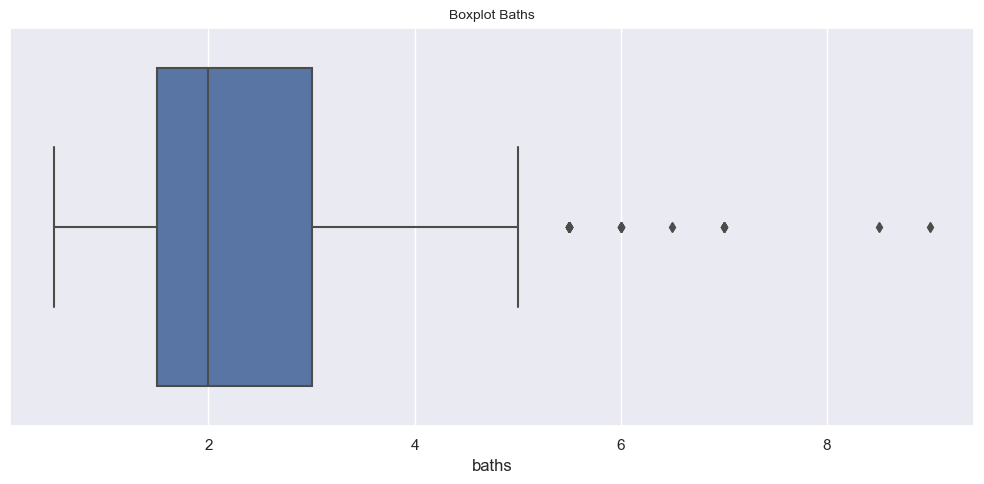

In [203]:
plt.figure(figsize = (10,5))
plt.title("Boxplot Baths", fontdict = {'fontsize': 10})
sns.boxplot(x=ds["baths"])
plt.tight_layout()
plt.show()

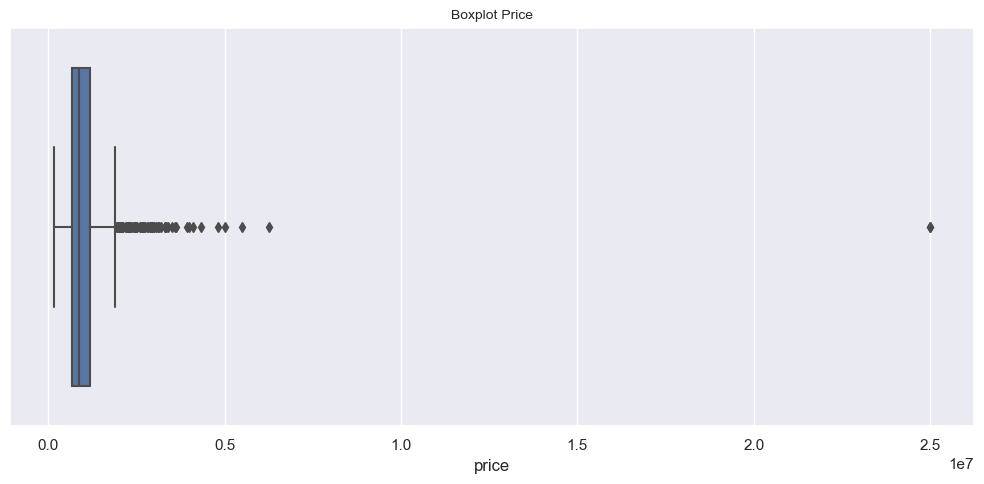

In [204]:
plt.figure(figsize = (10,5))
plt.title("Boxplot Price", fontdict = {'fontsize': 10})
sns.boxplot(x=ds["price"])
plt.tight_layout()
plt.show()

In [205]:
ds = ds[ds['price'] < 5000000]
ds.shape

(1662, 5)

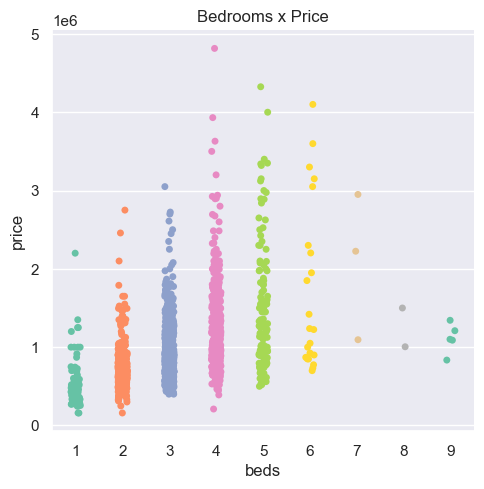

In [206]:
sns.catplot(x = "beds", y = "price", palette = "Set2", data = ds).set(title='Bedrooms x Price')

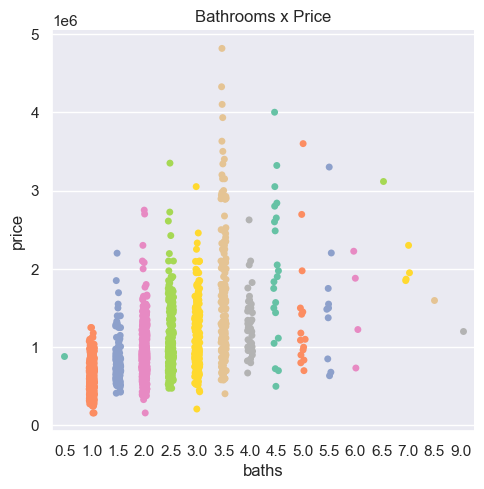

In [207]:
sns.catplot(x = "baths", y = "price", palette = "Set2", data = ds).set(title='Bathrooms x Price')

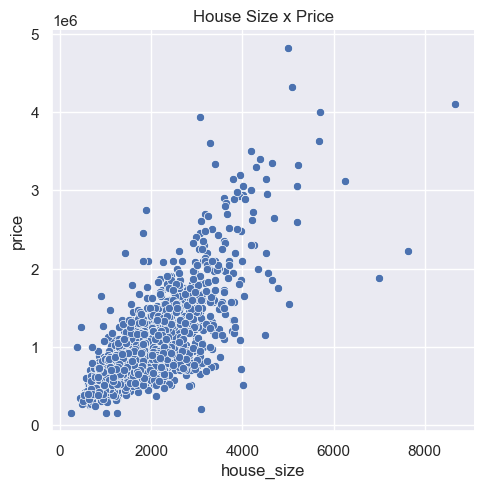

In [208]:
sns.relplot(x='house_size', y = 'price' , data = ds).set(title='House Size x Price')

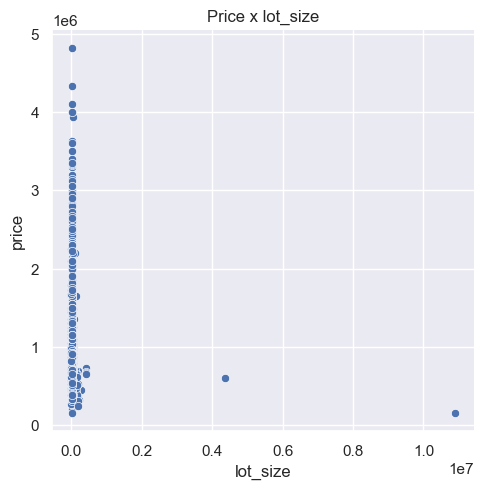

In [209]:
sns.relplot(x='lot_size', y = 'price' , data = ds).set(title='Price x lot_size')

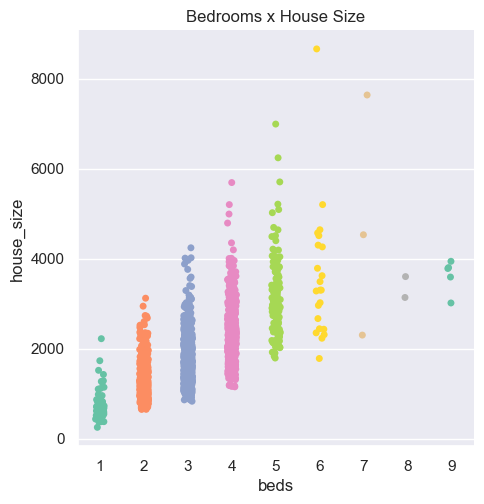

In [210]:
sns.catplot(x = "beds", y = "house_size", palette = "Set2", data = ds).set(title='Bedrooms x House Size')

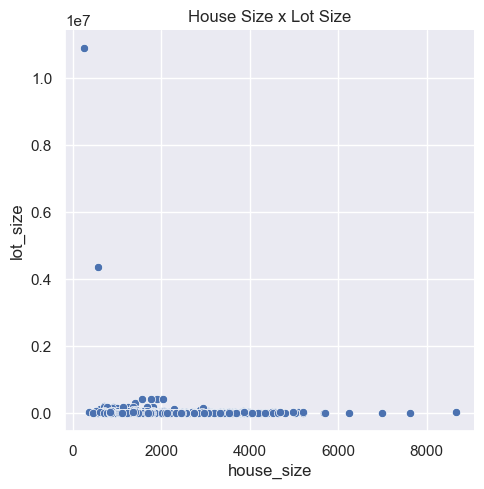

In [211]:
sns.relplot(x='house_size', y = 'lot_size' , data = ds).set(title='House Size x Lot Size')

# DATA CLEANING

In [212]:
ds.head(10)

,beds,baths,house_size,lot_size,price
0,3,2.50,2590,6000.00,795000
1,4,2.00,2240,13504.00,915000
2,4,3.00,2040,3783.00,950000
3,4,3.00,3800,5175.00,1950000
5,2,2.00,1190,43560.00,740000
6,1,1.00,670,6000.00,460000
7,5,3.50,4510,6000.00,3150000
8,3,2.50,1520,741.00,565000
9,4,2.00,2340,9500.00,699000
10,3,2.00,1320,1386.00,899000


In [213]:
ds.drop(['lot_size'], axis='columns', inplace=True)
ds.head(10)

,beds,baths,house_size,price
0,3,2.50,2590,795000
1,4,2.00,2240,915000
2,4,3.00,2040,950000
3,4,3.00,3800,1950000
5,2,2.00,1190,740000
6,1,1.00,670,460000
7,5,3.50,4510,3150000
8,3,2.50,1520,565000
9,4,2.00,2340,699000
10,3,2.00,1320,899000


# DATA SPLIT

In [238]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1662 entries, 0 to 2015
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   beds        1662 non-null   int64  
 1   baths       1662 non-null   float64
 2   house_size  1662 non-null   int64  
 3   price       1662 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 129.5 KB


In [239]:
x = ds.iloc[:, :-1].values
x

array([[3.00e+00, 2.50e+00, 2.59e+03],
       [4.00e+00, 2.00e+00, 2.24e+03],
       [4.00e+00, 3.00e+00, 2.04e+03],
       ...,
       [3.00e+00, 2.00e+00, 1.37e+03],
       [4.00e+00, 2.00e+00, 2.14e+03],
       [3.00e+00, 2.00e+00, 1.71e+03]])

In [240]:
y = ds.iloc[:, 3].values
y

array([ 795000,  915000,  950000, ...,  910000, 1150000,  659000],
      dtype=int64)

In [241]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [242]:
x_train.shape, y_train.shape

((1163, 3), (1163,))

In [243]:
x_test.shape, y_test.shape

((499, 3), (499,))

# SCALE DATA

In [244]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# MODEL

In [245]:
# Linear Regression
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train_scaled, y_train)

LinearRegression()

In [246]:
y_pred_linear = linear_reg_model.predict(x_test_scaled)
y_pred_linear

array([ 672778.11353283,  756870.11455999,  635551.45503473,
        753368.59692139,  841039.44148732, 2068052.3986644 ,
        838612.59584255,  819576.15310132, 1393839.30001111,
        751359.35749456,  668762.02187561,  822002.99874609,
        839878.81624129,  605416.17226247, 1397864.01902036,
       1275613.17925854,  440324.70898084,  440057.60102128,
       1059215.51398339, 1022637.29390914,  982232.14338614,
        789432.24297702,  926494.63071389, 1078166.00347242,
        953565.64396599, 1072655.24640699,  434822.57926744,
        788689.22394893,  959188.23633972,  941723.78490687,
        894141.30540583, 1070219.77341018,  978216.05172892,
        866321.03297004,  710107.9799872 , 1635076.53425766,
       1079737.9947808 ,  754852.24778113, 1353604.289647  ,
       1328057.97740116, 1229021.18484464,  778324.77559396,
       1585058.58175981,  725871.35009931,  723547.7124108 ,
       1098774.43752203,  606150.56393852,  899634.80776719,
        908418.63746175,

In [247]:
# Evaluate the model
score_linear = linear_reg_model.score(x_test_scaled, y_test)
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)

In [248]:
print("Linear Regression Results:")
print(f"Score: {score_linear}")
print(f"R2 Score: {r2_linear}")
print(f"MAE: {mae_linear}")
print(f"MSE: {mse_linear}")

Linear Regression Results:
Score: 0.6246404604838646
R2 Score: 0.6246404604838646
MAE: 220187.09089404554
MSE: 111022606857.72063


In [249]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor()
random_forest_model.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [250]:
y_pred_rf = random_forest_model.predict(x_test_scaled)

In [251]:
# Evaluate the model
score_rf = random_forest_model.score(x_test_scaled, y_test)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

In [252]:
print("Random Forest Regression Results:")
print(f"Score: {score_rf}")
print(f"R2 Score: {r2_rf}")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")

Random Forest Regression Results:
Score: 0.5618735505744696
R2 Score: 0.5618735505744696
MAE: 239882.88495144979
MSE: 129587596498.12689


## Score:
- Linear Regression: 0.6246
- Random Forest Regression: 0.5634
The score generally represents the coefficient of determination (R2) for regression models. A higher score indicates a better fit to the data. In this case, Linear Regression has a higher score, suggesting that it explains more of the variance in the target variable compared to Random Forest Regression.

## R2 Score:
- Linear Regression: 0.6246
- Random Forest Regression: 0.5634

R2 score is a measure of how well the model explains the variance in the target variable. Similar to the score, a higher R2 indicates a better fit. Linear Regression has a higher R2 score, indicating that it provides a better fit to the data.

## Mean Absolute Error (MAE):
- Linear Regression: 220,187.09
- Random Forest Regression: 237,727.10

MAE represents the average absolute difference between the predicted and actual values. A lower MAE is desirable, as it indicates smaller errors. In this case, Linear Regression has a lower MAE, suggesting better accuracy compared to Random Forest Regression.

## Mean Squared Error (MSE):
- Linear Regression: 111,022,606,857.72
- Random Forest Regression: 129,126,147,767.10

MSE measures the average squared difference between the predicted and actual values. Like MAE, a lower MSE is better. Linear Regression has a lower MSE, indicating smaller squared errors compared to Random Forest Regression.

## Conclusion:
Based on the provided metrics, Linear Regression outperforms Random Forest Regression in terms of Score, R2 Score, MAE, and MSE. It appears to provide a better fit to the data and makes more accurate predictions in this particular scenario.